# Grid plot of the photodiode area

In [1]:
import numpy as np
import matplotlib as plt
import h5py

In [2]:
#access data from hdf5 file IRdetection\Experiments\PhotodiodeArea\run-5\integrals.h5
with h5py.File('../Experiments/PhotodiodeArea/run-5/integrals.h5', 'r') as f:
    a_group_key = list(f.keys())
    data = []
    freq_duty = []
    frequencies = []
    duties = [] 
    for a in a_group_key:
        data.append(f[a][:])
        freq_duty.append((f[a].attrs['frequency'], f[a].attrs['duty_cycle']))
        frequencies.append(f[a].attrs['frequency'])
        duties.append(f[a].attrs['duty_cycle'])
    
# Convert to numpy arrays
frequencies = np.array(frequencies)
duties = np.array(duties)

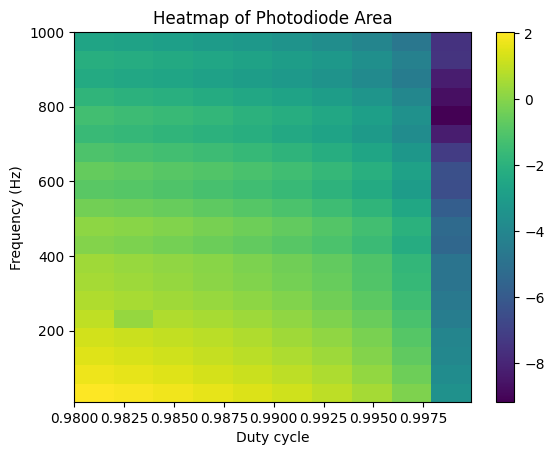

In [14]:
#create heatmap of the data[0][:]

import matplotlib.pyplot as plt

# Reshape data for the heatmap
unique_frequencies = np.unique(frequencies)
unique_duties = np.unique(duties)
heatmap_data = np.ones((len(unique_frequencies), len(unique_duties)))*999

for i, freq in enumerate(unique_frequencies):
    for j, duty in enumerate(unique_duties):
        # Find the index where this frequency and duty cycle combination exists
        idx = np.where((frequencies == freq) & (duties == duty))[0]
        if len(idx) > 0:
            # Using first element of data array for heatmap
            heatmap_data[i, j] = np.log(np.abs(data[idx[0]][0])) # Using first value of the data point

plt.imshow(heatmap_data, cmap='viridis', 
           extent=[min(unique_duties), max(unique_duties), min(unique_frequencies), max(unique_frequencies)],
           aspect='auto', origin='lower')
plt.colorbar()
plt.title('Heatmap of Photodiode Area')
plt.xlabel('Duty cycle')
plt.ylabel('Frequency (Hz)')
plt.show()